# Data Mining

In [1]:
#from fake_useragent import UserAgent
#importing libraries 
import requests
from fake_useragent import UserAgent
import csv
import re
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException
from bs4 import BeautifulSoup

from selenium import webdriver

In [2]:
ua = UserAgent()
#print(ua.chrome)
header = {'User-Agent':str(ua.chrome)}
print(header)

{'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36'}


In [3]:
def searching(url,query,page_no):
    """
    This is a function which searches for the page based on the url and the query
    Parameters :
    url = main site from which the data to be parsed
    query = product/word that to be searches
    returns : page if found or else error
    """
    path = url + query +"&page=" + str(page_no)
    #driver = webdriver.Firefox(executable_path="D:\\applied AI\\Selenium\\geckodriver-v0.26.0-win64\\geckodriver.exe")
    #driver.maximize_window() 
    #driver.get(path)
    #return driver.page_source
    page = requests.get(path, headers =header)
    if page.status_code == 200:
        return page.content 
    else:
        return "Error"
    
    

In [5]:
def asin(url,query,page_no):
    """
    Get the ASIN(Amzon Standard Identification Number for the products)
    Parameters:
    url = main url from where the asin needs to be scraped
    query = product category from which the asins to be scraped
    returns : list of asins of the products
    """
    product_asin = []
    response = searching(url,query,page_no)
    soup = BeautifulSoup(response,'html.parser')
    for i in soup.find_all("div",{"class":"sg-col-20-of-24 s-result-item s-asin sg-col-0-of-12 sg-col-28-of-32 sg-col-16-of-20 sg-col sg-col-32-of-36 sg-col-12-of-16 sg-col-24-of-28"}):
        product_asin.append(i['data-asin'])
    return product_asin

In [13]:
url = "https://www.amazon.in/s?k="
query = "smartphone"

In [11]:
asins = []
for i in range(7):
    asins.extend(asin(url,query,i))

In [12]:
len(asins)

112

In [14]:
driver = webdriver.Firefox(executable_path="D:\\applied AI\\Selenium\\geckodriver-v0.26.0-win64\\geckodriver.exe")
driver.maximize_window()

In [15]:
def link_asin(asin):
    """
    This function returns the link of the products based on its asin number
    Parameters:
    asin = amazon standard indentification number of a product
    Returns:
    link of the asin product passed as an argument
    """
    #https://stackoverflow.com/questions/12159775/create-link-with-amazon-asin-number-to-link-the-right-country-e-g-amazon-com
    url="https://www.amazon.in/dp/"+asin
#print(url)
    #driver = webdriver.Firefox(executable_path="D:\\applied AI\\Selenium\\geckodriver-v0.26.0-win64\\geckodriver.exe")
    #driver.maximize_window()
    driver.get(url)
    return driver.page_source

In [16]:
def details(asin):
    """
    This function scrapes the title, review text and rating for the given asin number
    Parameters:
    asin: Amzaon Standard Indentification Number
    Returns:
    Rating, Review text and Title
    """
    review =[]
    rating = []
    title = []
    product_name = []
    page = link_asin(asin)
    soup = BeautifulSoup(page,'html.parser')
    try:
        review.append(soup.find("div",{"class":"a-row a-spacing-small review-data"}).text)
    except:
        review.append("None")
    try:
        rating.append(soup.find("span",{"class":"a-icon-alt"}).text)
    except:
        rating.append("None")
    try:
        title.append(soup.find("a",{"class":"a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold"}).text)
    except:
        title.append("None")
    try:
        product_name.append(soup.find("span",{"id":"productTitle"}).text)
    except:
        product_name.append("None")
    return [review,rating , title,product_name]

In [17]:
reviews2=[]
ratings2 = []
titles2 = []
product_names = []
for i in asins:
    review , rating, title,product_name = details(i)
    reviews2.append(review)
    ratings2.append(rating)
    titles2.append(title)
    product_names.append(product_name)

In [22]:
reviews2

[['\n\n  \xa0Defective product shipped.. reported within a  few  hours of receipt and no one showed up for inspection despite several follow ups. Now, it is not being replaced or refunded. Horrible experience!!\n\nRead more'],
 ['\n\n  Damaged product\n\nRead more'],
 ["\n\n  Update (15/08/2020):Never give a chance to regret..  Go ahead...👍The Icons looks was not so great ..  And then I set 'Spherlue Icons' from theam and now its looks better with dark mode ...Even though its 6000 Mah I always leaves phone on charging before go to bed ( I like to see my phone 100% every morning 🙂 )..  So I turned off fast charging option.. You can do that.. Its will not affect  batteryMONSTER :1. Battery :- 5/5Two day battery standby for normal easy2.Display:- 4.99/5Super amaload with full hd.. Superb Display3.Design:3/5It has a6000Mah battery,  still looking not bulky. Noglass body,  but who cares after you put a back cover..  In my opinion, don't spend more money for glass body if you uses back cover

In [23]:
product_reviews=[]
product_titles = []
product_ratings =[]
pro_names = []
product_reviews.extend(reviews2)
product_titles.extend(titles2)
product_ratings.extend(ratings2)
pro_names.extend(product_names)


In [29]:
d={
    "ASIN":asins,
    "Reviews":product_reviews,
    "Titles":product_titles,
    "Ratings":product_ratings,
    "Product_Names": pro_names
}

In [30]:
import pandas as pd
data = pd.DataFrame(d)

In [31]:
data.head()

,ASIN,Reviews,Titles,Ratings,Product_Names
0,B07X4R63DF,[\n\n Defective product shipped.. reported w...,[\nPray you don't receive a defective product\n],[4.0 out of 5 stars],"[\n\n\n\n\n\n\n\nRedmi 8A Dual (Sea Blue, 2GB ..."
1,B086KCCMCP,[\n\n Damaged product\n\nRead more],[\nVery chipper quality\n],[3.9 out of 5 stars],"[\n\n\n\n\n\n\n\nSamsung Galaxy M01 (Black, 3G..."
2,B07HGJJ559,[\n\n Update (15/08/2020):Never give a chance...,[\nValue For Money !! Go for it\n],[4.2 out of 5 stars],[\n\n\n\n\n\n\n\nSamsung Galaxy M21 (Midnight ...
3,B089MQ622N,[\n\n Thank you samsung and Amazon for timely...,[\n#samsunghitsbullseye\n],[3.1 out of 5 stars],[\n\n\n\n\n\n\n\nSamsung Galaxy M01 Core (Blac...
4,B07SDPJ4XJ,[\n\n Brought this phone for my wife who is d...,[\nGood opportunity for oppo lovers to upgrade\n],[4.2 out of 5 stars],"[\n\n\n\n\n\n\n\nOPPO A5 2020 (Dazzling White,..."


In [32]:
import os
os.chdir("D:\\firefox downloads\\73strings")

In [33]:
data.to_csv("amazon_reviews_names.csv", sep=',',index=False)

In [34]:
d1={
    "ASIN":asins,
    "Reviews":product_reviews,
    "Titles":product_titles,
    "Ratings":product_ratings,
}

In [35]:
data1 = pd.DataFrame(d1)

In [36]:
data1.head()

,ASIN,Reviews,Titles,Ratings
0,B07X4R63DF,[\n\n Defective product shipped.. reported w...,[\nPray you don't receive a defective product\n],[4.0 out of 5 stars]
1,B086KCCMCP,[\n\n Damaged product\n\nRead more],[\nVery chipper quality\n],[3.9 out of 5 stars]
2,B07HGJJ559,[\n\n Update (15/08/2020):Never give a chance...,[\nValue For Money !! Go for it\n],[4.2 out of 5 stars]
3,B089MQ622N,[\n\n Thank you samsung and Amazon for timely...,[\n#samsunghitsbullseye\n],[3.1 out of 5 stars]
4,B07SDPJ4XJ,[\n\n Brought this phone for my wife who is d...,[\nGood opportunity for oppo lovers to upgrade\n],[4.2 out of 5 stars]


In [37]:
data1.to_csv("amazon_reviews1.csv", sep=',',index=False)

# Data Cleaning and Preprocessing

In [38]:
import pandas as pd 
import matplotlib.pyplot as plt 
import os
import numpy as np
import re

os.chdir("D:\\firefox downloads\\73strings")

In [39]:
data = pd.read_csv("amazon_reviews1.csv")

In [40]:
data.head()

,ASIN,Reviews,Titles,Ratings
0,B07X4R63DF,['\n\n \xa0Defective product shipped.. report...,"[""\nPray you don't receive a defective product...",['4.0 out of 5 stars']
1,B086KCCMCP,['\n\n Damaged product\n\nRead more'],['\nVery chipper quality\n'],['3.9 out of 5 stars']
2,B07HGJJ559,"[""\n\n Update (15/08/2020):Never give a chanc...",['\nValue For Money !! Go for it\n'],['4.2 out of 5 stars']
3,B089MQ622N,"[""\n\n Thank you samsung and Amazon for timel...",['\n#samsunghitsbullseye\n'],['3.1 out of 5 stars']
4,B07SDPJ4XJ,['\n\n Brought this phone for my wife who is ...,['\nGood opportunity for oppo lovers to upgrad...,['4.2 out of 5 stars']


We can see that every other column except for the ASIN column is a list of values we need to convert those values into string first and then convert **Ratings** column into integer type

In [41]:
#how to convert each value in a column pandas from list to string
#https://stackoverflow.com/questions/37347725/converting-a-panda-df-list-into-a-string/37347837
data['reviews'] = data["Reviews"].astype(str).str.replace('\[|\]|\'', '')

In [42]:
data.head()

,ASIN,Reviews,Titles,Ratings,reviews
0,B07X4R63DF,['\n\n \xa0Defective product shipped.. report...,"[""\nPray you don't receive a defective product...",['4.0 out of 5 stars'],\n\n \xa0Defective product shipped.. reported...
1,B086KCCMCP,['\n\n Damaged product\n\nRead more'],['\nVery chipper quality\n'],['3.9 out of 5 stars'],\n\n Damaged product\n\nRead more
2,B07HGJJ559,"[""\n\n Update (15/08/2020):Never give a chanc...",['\nValue For Money !! Go for it\n'],['4.2 out of 5 stars'],"""\n\n Update (15/08/2020):Never give a chance..."
3,B089MQ622N,"[""\n\n Thank you samsung and Amazon for timel...",['\n#samsunghitsbullseye\n'],['3.1 out of 5 stars'],"""\n\n Thank you samsung and Amazon for timely..."
4,B07SDPJ4XJ,['\n\n Brought this phone for my wife who is ...,['\nGood opportunity for oppo lovers to upgrad...,['4.2 out of 5 stars'],\n\n Brought this phone for my wife who is di...


In [43]:
#how to convert each value in a column pandas from list to string
#https://stackoverflow.com/questions/37347725/converting-a-panda-df-list-into-a-string/37347837
data['ratings'] = data["Ratings"].astype(str).str.replace('\[|\]|\'', '')
data.head()

,ASIN,Reviews,Titles,Ratings,reviews,ratings
0,B07X4R63DF,['\n\n \xa0Defective product shipped.. report...,"[""\nPray you don't receive a defective product...",['4.0 out of 5 stars'],\n\n \xa0Defective product shipped.. reported...,4.0 out of 5 stars
1,B086KCCMCP,['\n\n Damaged product\n\nRead more'],['\nVery chipper quality\n'],['3.9 out of 5 stars'],\n\n Damaged product\n\nRead more,3.9 out of 5 stars
2,B07HGJJ559,"[""\n\n Update (15/08/2020):Never give a chanc...",['\nValue For Money !! Go for it\n'],['4.2 out of 5 stars'],"""\n\n Update (15/08/2020):Never give a chance...",4.2 out of 5 stars
3,B089MQ622N,"[""\n\n Thank you samsung and Amazon for timel...",['\n#samsunghitsbullseye\n'],['3.1 out of 5 stars'],"""\n\n Thank you samsung and Amazon for timely...",3.1 out of 5 stars
4,B07SDPJ4XJ,['\n\n Brought this phone for my wife who is ...,['\nGood opportunity for oppo lovers to upgrad...,['4.2 out of 5 stars'],\n\n Brought this phone for my wife who is di...,4.2 out of 5 stars


In [44]:
#how to convert each value in a column pandas from list to string
#https://stackoverflow.com/questions/37347725/converting-a-panda-df-list-into-a-string/37347837
data['titles'] = data["Titles"].astype(str).str.replace('\[|\]|\'', '')
data.head()

,ASIN,Reviews,Titles,Ratings,reviews,ratings,titles
0,B07X4R63DF,['\n\n \xa0Defective product shipped.. report...,"[""\nPray you don't receive a defective product...",['4.0 out of 5 stars'],\n\n \xa0Defective product shipped.. reported...,4.0 out of 5 stars,"""\nPray you dont receive a defective product\n"""
1,B086KCCMCP,['\n\n Damaged product\n\nRead more'],['\nVery chipper quality\n'],['3.9 out of 5 stars'],\n\n Damaged product\n\nRead more,3.9 out of 5 stars,\nVery chipper quality\n
2,B07HGJJ559,"[""\n\n Update (15/08/2020):Never give a chanc...",['\nValue For Money !! Go for it\n'],['4.2 out of 5 stars'],"""\n\n Update (15/08/2020):Never give a chance...",4.2 out of 5 stars,\nValue For Money !! Go for it\n
3,B089MQ622N,"[""\n\n Thank you samsung and Amazon for timel...",['\n#samsunghitsbullseye\n'],['3.1 out of 5 stars'],"""\n\n Thank you samsung and Amazon for timely...",3.1 out of 5 stars,\n#samsunghitsbullseye\n
4,B07SDPJ4XJ,['\n\n Brought this phone for my wife who is ...,['\nGood opportunity for oppo lovers to upgrad...,['4.2 out of 5 stars'],\n\n Brought this phone for my wife who is di...,4.2 out of 5 stars,\nGood opportunity for oppo lovers to upgrade\n


In [45]:
data.drop(["Reviews","Titles","Ratings"],axis = 'columns',inplace=True)

In [46]:
data.head()

,ASIN,reviews,ratings,titles
0,B07X4R63DF,\n\n \xa0Defective product shipped.. reported...,4.0 out of 5 stars,"""\nPray you dont receive a defective product\n"""
1,B086KCCMCP,\n\n Damaged product\n\nRead more,3.9 out of 5 stars,\nVery chipper quality\n
2,B07HGJJ559,"""\n\n Update (15/08/2020):Never give a chance...",4.2 out of 5 stars,\nValue For Money !! Go for it\n
3,B089MQ622N,"""\n\n Thank you samsung and Amazon for timely...",3.1 out of 5 stars,\n#samsunghitsbullseye\n
4,B07SDPJ4XJ,\n\n Brought this phone for my wife who is di...,4.2 out of 5 stars,\nGood opportunity for oppo lovers to upgrade\n


In [47]:
data.shape

(112, 4)

Now we need to clean the text present in the **reviews** columns and **titles** column and also convert our **ratings** columns into float type, we can also drop our asin columns as its a product specific column

In [48]:
data.drop("ASIN",axis = "columns",inplace=True)

## cleaning ratings 

In [49]:
lst = []
for val in data["ratings"]:
    x = val[0:3]
    try:
        lst.append(float(x))
    except:
        lst.append(np.nan)

In [50]:
data["score"] = lst

In [51]:
data.head()

,reviews,ratings,titles,score
0,\n\n \xa0Defective product shipped.. reported...,4.0 out of 5 stars,"""\nPray you dont receive a defective product\n""",4.0
1,\n\n Damaged product\n\nRead more,3.9 out of 5 stars,\nVery chipper quality\n,3.9
2,"""\n\n Update (15/08/2020):Never give a chance...",4.2 out of 5 stars,\nValue For Money !! Go for it\n,4.2
3,"""\n\n Thank you samsung and Amazon for timely...",3.1 out of 5 stars,\n#samsunghitsbullseye\n,3.1
4,\n\n Brought this phone for my wife who is di...,4.2 out of 5 stars,\nGood opportunity for oppo lovers to upgrade\n,4.2


In [52]:
data.drop("ratings", axis = "columns", inplace = True)

In [53]:
data.head()

,reviews,titles,score
0,\n\n \xa0Defective product shipped.. reported...,"""\nPray you dont receive a defective product\n""",4.0
1,\n\n Damaged product\n\nRead more,\nVery chipper quality\n,3.9
2,"""\n\n Update (15/08/2020):Never give a chance...",\nValue For Money !! Go for it\n,4.2
3,"""\n\n Thank you samsung and Amazon for timely...",\n#samsunghitsbullseye\n,3.1
4,\n\n Brought this phone for my wife who is di...,\nGood opportunity for oppo lovers to upgrade\n,4.2


In [54]:
data.dtypes

reviews     object
titles      object
score      float64
dtype: object

In [55]:
(data["score"]>=4.0).value_counts()

True     78
False    34
Name: score, dtype: int64

Now we can convert our score into binary values where score of **more than 3 can be considered as positive review(1)** and **3 or less than 3 as negative(0)** ; 


**Note**:

We can also consider score less than 3 as negative and more than 3 as positive and 3 as neutral and remove neutral reviews but since we have only 100 datapoints therefore we are not removing any values based on this

In [56]:
def convert(s):
    """
    This function takes float value can checks if its greater than equal to 4.0 returns  1 else returns 0
    Parameters:
    s = float value
    Returns:
    1/0 based on the condition
    """
#for val in s:

    if (s>=4.0):
        return 1
    else:
        return 0

In [57]:
data["score"] = data["score"].apply(convert)

In [58]:
data.head()

,reviews,titles,score
0,\n\n \xa0Defective product shipped.. reported...,"""\nPray you dont receive a defective product\n""",1
1,\n\n Damaged product\n\nRead more,\nVery chipper quality\n,0
2,"""\n\n Update (15/08/2020):Never give a chance...",\nValue For Money !! Go for it\n,1
3,"""\n\n Thank you samsung and Amazon for timely...",\n#samsunghitsbullseye\n,0
4,\n\n Brought this phone for my wife who is di...,\nGood opportunity for oppo lovers to upgrade\n,1


In [59]:
data["score"].value_counts()

1    78
0    34
Name: score, dtype: int64

# Text Preprocessing


**Preprocessing requires following steps :-**

1. Begin by removing the html tags
2. Remove any punctuations or limited set of special characters like , or . or # etc
3. Check if the word is made up of english letters and is not alpha-numeric
4. Check to see if the length of the word is greater than 2
5. Convert the text in lowercase
6. Remove the stopwords
7. Finally we to stemming using snowball stemming


## Review Text

We can see that there **emojis** , **numbers** , **\n** present and these are to be removed , moreover we need to see how many none values are present we represent that no one has given review for that phone

In [60]:
# https://stackoverflow.com/a/47091490/4084039
#what is decontracted words - http://www.whitehall-i.walsall.sch.uk/pupils/help-for-your-writing/spelling-rules-ok/contracted-words/
import re

def decontracted(phrase):
    # specific
    """
    This function takes a string/text as an arguement and converts contracted words like won't , can't etc and 
    converts those words present in text into decontracted words like  would not , could not etc
    Returns :
    
    """
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [61]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk 
import seaborn as sns 

In [62]:
# 5- Remving Stopwords
s=set(stopwords.words('english'))
print(s)

{'do', 'y', "it's", 'won', 'his', 'now', "couldn't", 'not', 'yourself', 'doing', 'for', 'above', 'needn', 'that', "hasn't", 'both', "hadn't", 'm', 'there', 'the', 'from', "should've", 'have', "don't", 'with', 'each', 'does', 'don', 'such', 'didn', 'theirs', 'whom', 'than', 'yourselves', 'or', "didn't", "aren't", 'these', 'ain', 'doesn', 'mightn', 'shouldn', "you'll", "weren't", 'by', 'himself', 're', "doesn't", "isn't", 'so', 'be', 'its', 'out', 'during', 'wouldn', 'she', 'having', 'herself', 'weren', 'where', 'more', 'through', 'mustn', 'their', 'then', "you'd", 'just', 'under', 'below', 'did', "wouldn't", 'over', 'ours', 'my', 'yours', 'has', 'any', 'an', 'this', 'o', 'were', 'again', 's', 'll', 'isn', 'couldn', 'am', 'him', 'further', "mightn't", 'they', 'should', "haven't", 'ourselves', 'own', "she's", 'if', 'been', 'when', 'up', 'shan', 'too', "you've", 'what', 'while', 'why', 'between', 'here', 'which', 'who', 'because', 'some', 'it', 'itself', 'hadn', 'a', 'those', 'no', 'was', 

In [72]:
nltk.download('stopwords')
#https://pythonprogramming.net/stop-words-nltk-tutorial/ to learn more about stopwords
sno=nltk.stem.SnowballStemmer('english')
def cleanhtml(sentence):
    """
    THis function using regex to remove the html tags if present
    Parameters:
    sentence to be cleaned
    Returns:
    sentence with removed html tags
    """
    cleanr=re.compile('<.*?>')
    cleantext=re.sub(cleanr," ",sentence)
    return cleantext
def cleanpunc(sentence):
    """
    This function removes the puctutions presents in the sentences
    Parameters:
    sentence from which punctuations to be removed
    Returns:
    sentence with removed punctuations 
    """
    cleaned=re.compile(r'[?|!|\'|"|#|.|,|)|(|\|/|]')
    clean_ed=re.sub(cleaned," ",sentence)
    return clean_ed
print("*********************")
print(sno.stem("tasty"))

*********************
tasti


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(data['reviews'].values):
    sentance = re.sub(r"http\S+", "", sentance) #removing https if present
    sentance= sentance.replace("\\n","").replace("  ","") #removing //n if present
    sentance= re.sub("\S*\d\S*", "", sentance).strip() #removing special characters and emojis
    sentance = cleanhtml(sentance) #html tags
    sentance = decontracted(sentance) #decontraction
    sentance = cleanpunc(sentance) #cleaning punctuation
    sentance = re.sub('[^A-Za-z0-9]+', ' ', sentance)# https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in s) #converting everything to lowercase and stopword removal 
    preprocessed_reviews.append(sentance.strip("'"))

100%|██████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 7981.14it/s]


In [65]:
preprocessed_reviews

['product shipped reported within afewhours receipt one showed inspection despite several follow ups replaced refunded horrible experience read',
 'damaged productread',
 'update give chance regret go ahead icons looks great set spherlue icons theam looks better dark mode even though mah always leaves phone charging go bed like see phone every morning turned fast charging option affectbatterymonster battery day battery standby normal amaload full hd superb battery still looking bulky noglass body cares put back cover opinion dont spend money glass body uses back camera camera pretty good front cameras low light output low many features available slow super slow videos os ui one print reader face lock face lock finger print reader performance meant pubg gamers perfect heavy gamer lag ang hang till processor charging fast charging provided charger iy takes hrs fully reacharge accessories earphone back cover screenguard order backcover tempered glass placing order backbody plastic amd pro

In [70]:
from nltk.tokenize import sent_tokenize, word_tokenize
def stemSentence(sentence):
    """
    This function takes a sentence as an input and then first tokenize the sentences into words and then snowball stemmer
    to stem these words.
    Parameter:
    sentence to be stem 
    Returns:
    Normalized sentence
    """
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(sno.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [73]:
data['preprocessed_reviews']=preprocessed_reviews
#final.drop(['Text'], axis=1,inplace=True)

In [74]:
data["preprocessed_reviews"] = data["preprocessed_reviews"].apply(stemSentence)

In [75]:
data["preprocessed_reviews"]

0      product ship report within afewhour receipt on...
1                                     damag productread 
2      updat give chanc regret go ahead icon look gre...
3      thank samsung amazon time rakshabandhan delive...
4      brought phone wife die hard fan oppo offer lik...
                             ...                        
107    clean bloatfre oxygeno run smooth amol screen ...
108                        awesom mobil price pointread 
109    good mobil best batteri onc charg day batteri ...
110                                                none 
111    price high specif perfect price everyth fineread 
Name: preprocessed_reviews, Length: 112, dtype: object

In [76]:
data.head()

,reviews,titles,score,preprocessed_reviews
0,\n\n \xa0Defective product shipped.. reported...,"""\nPray you dont receive a defective product\n""",1,product ship report within afewhour receipt on...
1,\n\n Damaged product\n\nRead more,\nVery chipper quality\n,0,damag productread
2,"""\n\n Update (15/08/2020):Never give a chance...",\nValue For Money !! Go for it\n,1,updat give chanc regret go ahead icon look gre...
3,"""\n\n Thank you samsung and Amazon for timely...",\n#samsunghitsbullseye\n,0,thank samsung amazon time rakshabandhan delive...
4,\n\n Brought this phone for my wife who is di...,\nGood opportunity for oppo lovers to upgrade\n,1,brought phone wife die hard fan oppo offer lik...


In [77]:
data.drop(['reviews'], axis=1,inplace=True)
data.head()

,titles,score,preprocessed_reviews
0,"""\nPray you dont receive a defective product\n""",1,product ship report within afewhour receipt on...
1,\nVery chipper quality\n,0,damag productread
2,\nValue For Money !! Go for it\n,1,updat give chanc regret go ahead icon look gre...
3,\n#samsunghitsbullseye\n,0,thank samsung amazon time rakshabandhan delive...
4,\nGood opportunity for oppo lovers to upgrade\n,1,brought phone wife die hard fan oppo offer lik...


## TitlesText

In [78]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(data['titles'].values):
    sentance = re.sub(r"http\S+", "", sentance) #removing https if present
    sentance= sentance.replace("\\n","").replace("  ","") #removing //n if present
    sentance= re.sub("\S*\d\S*", "", sentance).strip() #removing special characters and emojis
    sentance = cleanhtml(sentance) #html tags
    sentance = decontracted(sentance) #decontraction
    sentance = cleanpunc(sentance) #cleaning punctuation
    sentance = re.sub('[^A-Za-z0-9]+', ' ', sentance)# https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in s) #converting everything to lowercase and stopword removal 
    preprocessed_titles.append(sentance.strip("'"))

100%|█████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 37341.98it/s]


In [79]:
data['preprocessed_titles']=preprocessed_titles
data.drop(['titles'], axis=1,inplace=True)

In [80]:
data.head()

,score,preprocessed_reviews,preprocessed_titles
0,1,product ship report within afewhour receipt on...,pray dont receive defective product
1,0,damag productread,chipper quality
2,1,updat give chanc regret go ahead icon look gre...,value money go
3,0,thank samsung amazon time rakshabandhan delive...,samsunghitsbullseye
4,1,brought phone wife die hard fan oppo offer lik...,good opportunity oppo lovers upgrade


In [81]:
data["preprocessed_titles"] = data["preprocessed_titles"].apply(stemSentence)
data.head()

,score,preprocessed_reviews,preprocessed_titles
0,1,product ship report within afewhour receipt on...,pray dont receiv defect product
1,0,damag productread,chipper qualiti
2,1,updat give chanc regret go ahead icon look gre...,valu money go
3,0,thank samsung amazon time rakshabandhan delive...,samsunghitsbullsey
4,1,brought phone wife die hard fan oppo offer lik...,good opportun oppo lover upgrad


In [82]:
data["preprocessed_reviews"].str.split().apply(len).values

array([ 18,   2, 142, 135, 108,  15,   7,  18,  18,  18, 142,  96, 135,
         2,  17,  15, 142,  18,   2, 135,  15, 108, 142,  18,  18,   7,
        96,  18,   2, 142, 135, 215,  11,  18,  15, 142,  96, 108,  46,
        15, 215,  15,  10,   7,  18,  18,   4,  18, 108,  13,  46,  18,
       215, 215,  16,  15,  10,  15,  99,  23,   4,  96,  29,  96, 108,
         1,   2,  99,  23,  23,  18,  15,  10,  16,   2,   1, 215,  96,
         1,  11,  20,   5,  99,   1,  15,  18,   1, 135,   3,  15,  23,
        10,   7,   1,  33,  15,   7,   3, 105,   5,  16,   2,  39,  20,
        39,   5,  15, 177,   4,  23,   1,   7], dtype=int64)

**We will create two more columns with stores the number of words present in each reviews and titles**

In [83]:
data["review_words"] = data["preprocessed_reviews"].str.split().apply(len).values
data["titles_words"] = data["preprocessed_titles"].str.split().apply(len).values

In [84]:
data.head()

,score,preprocessed_reviews,preprocessed_titles,review_words,titles_words
0,1,product ship report within afewhour receipt on...,pray dont receiv defect product,18,5
1,0,damag productread,chipper qualiti,2,2
2,1,updat give chanc regret go ahead icon look gre...,valu money go,142,3
3,0,thank samsung amazon time rakshabandhan delive...,samsunghitsbullsey,135,1
4,1,brought phone wife die hard fan oppo offer lik...,good opportun oppo lover upgrad,108,5


**Now we have cleaned our data and now next step is exploring about the data** 

**Score** is our dependent variable

**Preprocessed Reviews and Preprocessed Titles** our independent variable and lets check our association between these dependent and independent variables

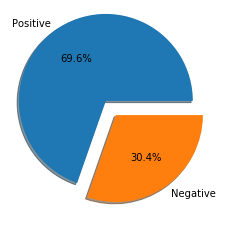

In [85]:
#how to plot a pie chart-> https://pythonspot.com/matplotlib-pie-chart/
#plt.pie documentation-> https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.pie.html

approved_not_approved=data['score'].value_counts()
explode=(0.2,0.0)
plt.pie(approved_not_approved,explode=explode,labels=['Positive','Negative'],shadow=True,autopct='%1.1f%%')
plt.show()

In [86]:
data.describe()

,score,review_words,titles_words
count,112.000000,112.000000,112.000000
mean,0.696429,48.080357,2.946429
std,0.461866,59.462023,1.564466
min,0.000000,1.000000,1.000000
25%,0.000000,9.250000,2.000000
50%,1.000000,18.000000,3.000000
75%,1.000000,96.000000,4.000000
max,1.000000,215.000000,7.000000


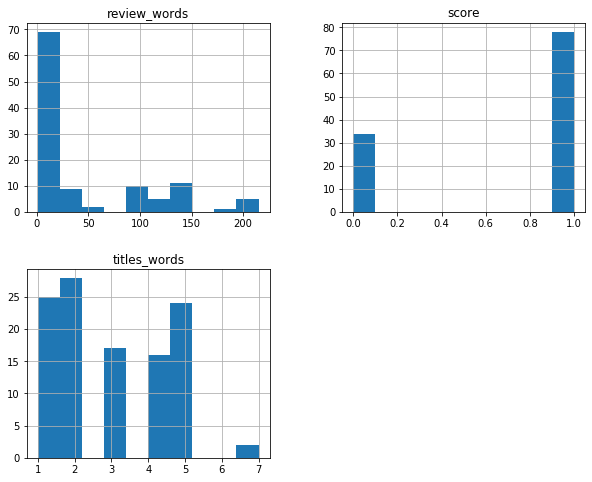

In [87]:
data.hist(figsize=(10,8));

**Descriptive Analysis**

For reviews we have **50words** on average on each review and since we have **standard deviation** of around **60** the data is very spread out(incosistent data) which can be clearly seen in the histogram of the review_words i.e the histogram is **positively skewed and most of the data lies between 0 to around 60** , some reviews(around 5) have around **200 words**

For titles we have a mean of **3words per title** with a standard deviation of **1.5**. Distribution has 3 modes one at around 1.5 , then around 3 and at 4.5

In [88]:
#masking separate dataframes for positive review and negative review so it will make it easy for us to use it in future and not to check it everytime 
positive_review = data[data["score"]==1]
negative_review = data[data["score"]==0]

In [89]:
positive_review.head()

,score,preprocessed_reviews,preprocessed_titles,review_words,titles_words
0,1,product ship report within afewhour receipt on...,pray dont receiv defect product,18,5
2,1,updat give chanc regret go ahead icon look gre...,valu money go,142,3
4,1,brought phone wife die hard fan oppo offer lik...,good opportun oppo lover upgrad,108,5
5,1,best camera good batteri life eat bodi materi ...,samsung rounderbest mobil,15,3
6,1,dont buy min game phone lag muchread,dont buy min game phone lag much,7,7


In [90]:
negative_review.head()

,score,preprocessed_reviews,preprocessed_titles,review_words,titles_words
1,0,damag productread,chipper qualiti,2,2
3,0,thank samsung amazon time rakshabandhan delive...,samsunghitsbullsey,135,1
12,0,thank samsung amazon time rakshabandhan delive...,samsunghitsbullsey,135,1
13,0,damag productread,chipper qualiti,2,2
15,0,camera sound option camera averag qualiti set ...,wast money,15,2


In [91]:
positive_review.describe()

,score,review_words,titles_words
count,78.0,78.000000,78.000000
mean,1.0,52.038462,3.448718
std,0.0,62.754819,1.525944
min,1.0,1.000000,1.000000
25%,1.0,15.000000,2.000000
50%,1.0,18.000000,4.000000
75%,1.0,96.000000,5.000000
max,1.0,215.000000,7.000000


In [92]:
negative_review.describe()

,score,review_words,titles_words
count,34.0,34.000000,34.000000
mean,0.0,39.000000,1.794118
std,0.0,50.812191,0.913847
min,0.0,1.000000,1.000000
25%,0.0,2.000000,1.000000
50%,0.0,15.000000,2.000000
75%,0.0,84.000000,2.000000
max,0.0,135.000000,5.000000


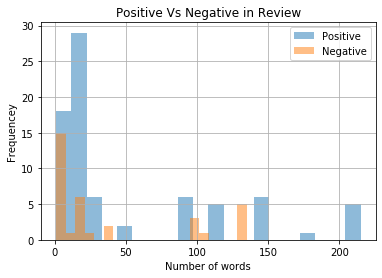

In [93]:
positive_review["review_words"].hist(alpha = 0.5,bins = 20, label = 'Positive')
negative_review["review_words"].hist(alpha = 0.5,bins = 20, label = 'Negative')
plt.ylabel("Frequencey")
plt.xlabel("Number of words")
plt.title("Positive Vs Negative in Review")
plt.legend();

We can see that for reviews number of words are more for **positive reviews** then for **negative reviews**

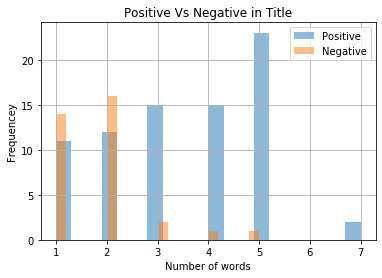

In [94]:
positive_review["titles_words"].hist(alpha = 0.5,bins = 20, label = 'Positive')
negative_review["titles_words"].hist(alpha = 0.5,bins = 20, label = 'Negative')
plt.ylabel("Frequencey")
plt.xlabel("Number of words")
plt.title("Positive Vs Negative in Title")
plt.legend();

for the titles we can see that 1-2 word titles are more for in **negative reviews** but the condtion reverses after  that and we see more words in positive review title then for the title with negative review

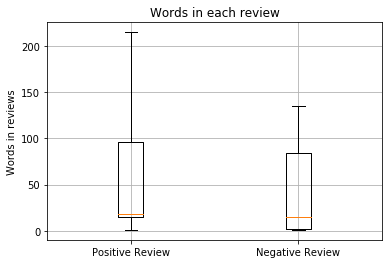

In [95]:
positive_word_count = positive_review["review_words"].values

negative_word_count = negative_review["review_words"].values

plt.boxplot([positive_word_count, negative_word_count])
plt.title('Words in each review')
plt.xticks([1,2],('Positive Review','Negative Review'))
plt.ylabel('Words in reviews')
plt.grid()
plt.show()


**For positive review**
1. Range is around ~230
2. IQR is around (100-15) = ~85
3. Median is around ~16
4. We have lot of high values that is beyond 75percentile

**For negative review**
1. Range is around 130
2. IQR is around (100-1) = ~99
3. Median is around ~15
4. It has less high values beyond 75percentile as compared to positive review

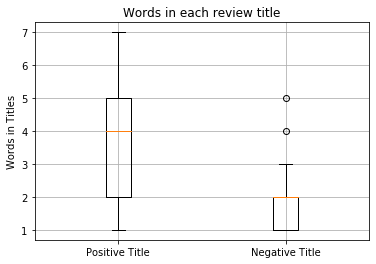

In [96]:
positive_word_count = positive_review["titles_words"].values

negative_word_count = negative_review["titles_words"].values

plt.boxplot([positive_word_count, negative_word_count])
plt.title('Words in each review title')
plt.xticks([1,2],('Positive Title','Negative Title'))
plt.ylabel('Words in Titles')
plt.grid()
plt.show()


**For positive title**
1. Range is around ~7-1 = 6
2. IQR is around (5-2) = ~3
3. Median is around 3

**For negative review**
1. Range is around 4-1= 3
2. IQR is around (2-1) = ~1
3. Median is around ~2
4. Outlier at 4
5. Median and 75percentile value both falls at 2

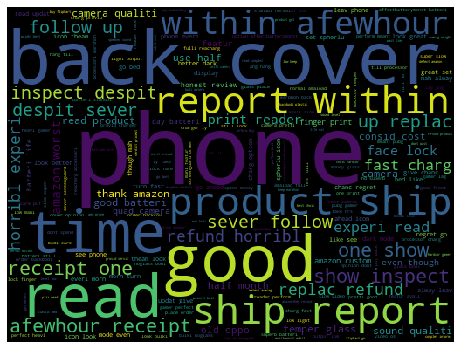

In [97]:
#Word Cloud of accepted project essay
from wordcloud import WordCloud
x = positive_review["preprocessed_reviews"]
text = " ".join(review for review in x)
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                      background_color='black',
                      width=512,
                      height=384
                         ).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('graph.png')

plt.show()

words like **phone, time, back , cover** dominate here we can also see words like **good,within** which could tell us that its a positive review during modelling

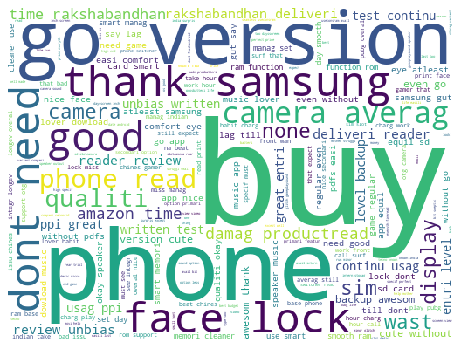

In [98]:
#Word Cloud of accepted project essay
from wordcloud import WordCloud
x = negative_review["preprocessed_reviews"]
text = " ".join(review for review in x)
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                      background_color='white',
                      width=512,
                      height=384
                         ).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('graph.png')

plt.show()

Words like **dont, need , work, version**  are highlighted here, but **thank** word is also present but is in the negative review, wonder why someone writes thank in negative review

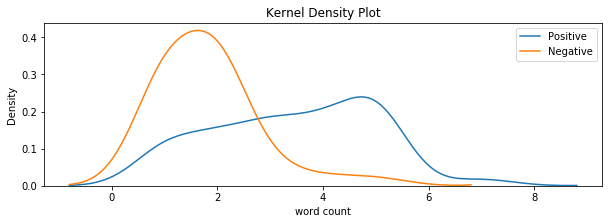

In [99]:
plt.figure(figsize=(10,3))
sns.kdeplot(positive_word_count,label="Positive", bw=0.6)
sns.kdeplot(negative_word_count,label="Negative", bw=0.6)
plt.xlabel("word count")
plt.ylabel("Density")
plt.title("Kernel Density Plot")
plt.legend()
plt.show()

**Positive word count** follows somewhat normal distribution with mean around **2**

**Negative word count** has much more spread distribution with two modes aroun **3** and around **6**

**Since we have small dataset we simply train our model to whole data and will not split the data into train, cross-validaton and test data**

In [100]:
data.head()

,score,preprocessed_reviews,preprocessed_titles,review_words,titles_words
0,1,product ship report within afewhour receipt on...,pray dont receiv defect product,18,5
1,0,damag productread,chipper qualiti,2,2
2,1,updat give chanc regret go ahead icon look gre...,valu money go,142,3
3,0,thank samsung amazon time rakshabandhan delive...,samsunghitsbullsey,135,1
4,1,brought phone wife die hard fan oppo offer lik...,good opportun oppo lover upgrad,108,5


In [101]:
y = data.loc[:,"score"]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: score, dtype: int64

In [102]:
data.drop("score",axis="columns",inplace= True)

In [103]:
data.head()

,preprocessed_reviews,preprocessed_titles,review_words,titles_words
0,product ship report within afewhour receipt on...,pray dont receiv defect product,18,5
1,damag productread,chipper qualiti,2,2
2,updat give chanc regret go ahead icon look gre...,valu money go,142,3
3,thank samsung amazon time rakshabandhan delive...,samsunghitsbullsey,135,1
4,brought phone wife die hard fan oppo offer lik...,good opportun oppo lover upgrad,108,5


# Vectorization

## Text 

In [104]:
from sklearn.feature_extraction.text import CountVectorizer

In [105]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
review_vect = count_vect.fit_transform(data['preprocessed_reviews'])
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)
print(type(review_vect))
print(review_vect.shape)
print(review_vect[5,0])
print('='*50)

some feature names  ['absent', 'absolut', 'accept', 'accessori', 'accomplish', 'accord', 'actual', 'advertis', 'afewhour', 'affectbatterymonst']
<class 'scipy.sparse.csr.csr_matrix'>
(112, 689)
0


In [106]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
title_vect = count_vect.fit_transform(data['preprocessed_titles'])
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)
print(type(title_vect))
print(title_vect.shape)
print(title_vect[5,0])
print('='*50)

some feature names  ['amazon', 'amez', 'android', 'averag', 'awesom', 'backup', 'bad', 'batteri', 'best', 'budget']
<class 'scipy.sparse.csr.csr_matrix'>
(112, 74)
0


## Numerical Data

In [107]:
#Normalizing Numerical Data 
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()
review_norm = norm.fit_transform(data['review_words'].values.reshape(-1,1))

#price_train=price_scalar.transform(X_train['price'].values.reshape(1,-1))
print("Shape of price train data after normalization",review_norm.shape)
print("price train data after normalization",review_norm[0:1])
print("="*50)

Shape of price train data after normalization (112, 1)
price train data after normalization [[-0.50814871]]


In [108]:
#Normalizing Numerical Data 
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()
title_norm = norm.fit_transform(data['titles_words'].values.reshape(-1,1))

#price_train=price_scalar.transform(X_train['price'].values.reshape(1,-1))
print("Shape of price train data after normalization",title_norm.shape)
print("price train data after normalization",title_norm[0:1])
print("="*50)

Shape of price train data after normalization (112, 1)
price train data after normalization [[1.31853339]]


# Modelling

Since the data is small we can try **K-Nearest Neighbours(KNN)** and also we can try **Naive Bayes** which is belived to perform better in case of text classification

In [109]:
title_norm.shape

(112, 1)

In [110]:
from scipy.sparse import hstack
X=hstack((review_vect,title_vect,review_norm,title_norm)).tocsr()

In [111]:
print(f"Final X's shape {X.shape} and Y's shape {y.shape}")

Final X's shape (112, 765) and Y's shape (112,)


## Applying K-NN 

In [112]:
#writting function for using batch-wise prediction
def batch_predict(neigh,data):
    '''Batch-Wise prediction is used to predict the class label in batches to fast process the knn algorithm'''
    y_train_pred = []
    loop_value=data.shape[0]-data.shape[0]%1000
    for i in range(0, loop_value, 1000): #range will be from 0 to 49041 with step of 1000pts each time so are values will be between 0-4000
        y_train_pred.extend(neigh.predict_proba(data[i:i+1000])[:,1])
    y_train_pred.extend(neigh.predict_proba(data[loop_value:])[:,1])
        
    return y_train_pred

C:\Users\aksha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


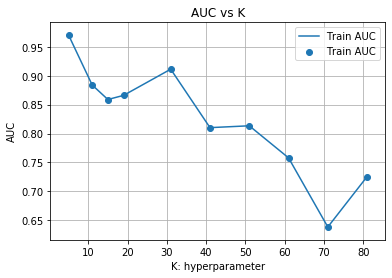

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
train_auc = []
cv_auc = []
K = [5, 11, 15, 19, 31, 41, 51,61,71,81]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, algorithm='brute')
    neigh.fit(X, y) #during fit our model is learning from the training data e.g. y=f(x)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    y_train_pred =  batch_predict(neigh,X)
    #y_cv_pred =  batch_predict(neigh,X_cv)
    #print(y_train.shape)
    #print(len(y_train_pred))
     #roc_auc_score->Compute(ROC AUC) from prediction scores.
    train_auc.append(roc_auc_score(y,y_train_pred))#roc_auc_score->Compute(ROC AUC) from prediction scores.
    #cv_auc.append(roc_auc_score(y_cv, y_cv_pred))    

    
plt.plot(K, train_auc, label='Train AUC') #Plotting K vs auc of train
plt.scatter(K, train_auc, label='Train AUC') #Scatter plot of K vs auc train

plt.legend() #adding legend
plt.xlabel("K: hyperparameter") #X axis-label
plt.ylabel("AUC")  #Y-axis label
plt.title("AUC vs K") #adding title of the plot
plt.grid()
plt.show()

We achieved a AUC score of ~97 for k = ~5 so we select K as the best value of KNN

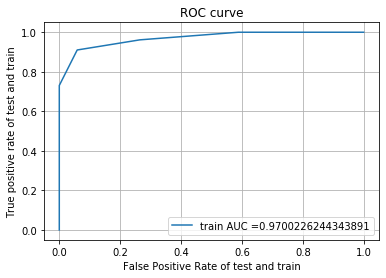

In [114]:
from sklearn.metrics import roc_curve,auc

neigh=KNeighborsClassifier(n_neighbors= 5)
neigh.fit(X,y)

#documentation of roc_curve ->https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
#roc_curve returns three values fpr,tpr and thresholds
y_train_predict=batch_predict(neigh,X)
train_fpr,train_tpr,train_thresholds= roc_curve(y,y_train_predict)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr))) #documentation of auc-> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

plt.legend()
plt.xlabel("False Positive Rate of test and train") #plt.plot documentation ->https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html
plt.ylabel("True positive rate of test and train")
plt.title("ROC curve")
plt.grid()
plt.show()

So we got an AUC score of 98% but due such small data we can have a condition of **overfitting**

## Confusion Matrix

In [115]:
def pred(proba,thresh, fpr ,tpr):
    """This function calculations and return the prediction with highest tpr and lowest tpr"""
    t=thresh[np.argmax(tpr*(1-fpr))] #t creates a numpy array with the max fpr and lowest tpr
    print("the maximum tpr*(1-fpr)",max(tpr*(1-fpr)),"for threshold",np.round(t,3))
    predictions=[]
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [116]:
from sklearn.metrics import confusion_matrix

print("Train confusion matrix")
cm=confusion_matrix(y, pred(y_train_predict, train_thresholds,train_fpr,train_tpr))
print(cm)

Train confusion matrix
the maximum tpr*(1-fpr) 0.8567119155354449 for threshold 0.6
[[32  2]
 [ 7 71]]


Text(0.5, 24.0, 'Predicted')

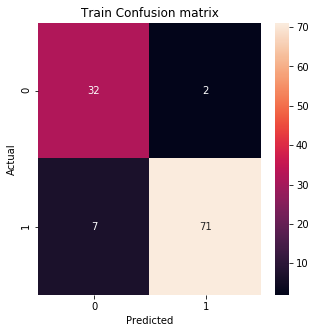

In [117]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

import seaborn as sn
df_cm=pd.DataFrame(cm,index=[0,1],columns=[0,1])
plt.figure(figsize = (5,5))
plt.title("Train Confusion matrix")
ax=sn.heatmap(df_cm, annot=True,fmt='g')
ax.set_ylabel("Actual")
ax.set_xlabel("Predicted")

Most of the predictions are right that''s why we get such a high AUC score but still it makes **9** mistakes

## Naive Bayes
Since NB is a probability based alogrithm we don't need to normalize the numerical values, but still its good practice to make the numerical features of same scale

In [118]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
review_norm = norm.fit_transform(data['review_words'].values.reshape(1,-1))

print("Shape after normalization",review_norm.shape)
print("data after normalization",review_norm[0:1])
print("="*50)

Shape after normalization (1, 112)
data after normalization [[0.02230261 0.00247807 0.17594279 0.16726955 0.13381564 0.01858551
  0.00867324 0.02230261 0.02230261 0.02230261 0.17594279 0.11894724
  0.16726955 0.00247807 0.02106357 0.01858551 0.17594279 0.02230261
  0.00247807 0.16726955 0.01858551 0.13381564 0.17594279 0.02230261
  0.02230261 0.00867324 0.11894724 0.02230261 0.00247807 0.17594279
  0.16726955 0.26639225 0.01362937 0.02230261 0.01858551 0.17594279
  0.11894724 0.13381564 0.05699555 0.01858551 0.26639225 0.01858551
  0.01239034 0.00867324 0.02230261 0.02230261 0.00495613 0.02230261
  0.13381564 0.01610744 0.05699555 0.02230261 0.26639225 0.26639225
  0.01982454 0.01858551 0.01239034 0.01858551 0.12266434 0.02849778
  0.00495613 0.11894724 0.03593198 0.11894724 0.13381564 0.00123903
  0.00247807 0.12266434 0.02849778 0.02849778 0.02230261 0.01858551
  0.01239034 0.01982454 0.00247807 0.00123903 0.26639225 0.11894724
  0.00123903 0.01362937 0.02478067 0.00619517 0.12266434

In [119]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
title_norm = norm.fit_transform(data['titles_words'].values.reshape(1,-1))

print("Shape after normalization",title_norm.shape)
print("data after normalization",title_norm[0:1])
print("="*50)

Shape after normalization (1, 112)
data after normalization [[0.14176199 0.0567048  0.0850572  0.0283524  0.14176199 0.0850572
  0.19846679 0.14176199 0.14176199 0.14176199 0.0850572  0.1134096
  0.0283524  0.0567048  0.0283524  0.0567048  0.0850572  0.14176199
  0.0567048  0.0283524  0.0850572  0.14176199 0.0850572  0.14176199
  0.14176199 0.19846679 0.1134096  0.14176199 0.0567048  0.0850572
  0.0283524  0.14176199 0.0850572  0.14176199 0.0567048  0.0850572
  0.1134096  0.14176199 0.14176199 0.0283524  0.14176199 0.0850572
  0.1134096  0.0283524  0.0283524  0.14176199 0.1134096  0.0567048
  0.14176199 0.0850572  0.1134096  0.0283524  0.14176199 0.14176199
  0.1134096  0.0850572  0.1134096  0.0850572  0.0567048  0.0567048
  0.0567048  0.1134096  0.0567048  0.1134096  0.14176199 0.0283524
  0.0567048  0.0567048  0.0567048  0.0567048  0.14176199 0.0567048
  0.0567048  0.1134096  0.0567048  0.0283524  0.14176199 0.1134096
  0.0283524  0.0850572  0.0283524  0.0283524  0.0567048  0.0283524

In [120]:
#reshaping our normalized vectors to make it compatible with the shape of vectorised text 
title_norm= title_norm.reshape(-1,1);
review_norm= review_norm.reshape(-1,1);

In [121]:
print(f"{title_norm.shape},{review_norm.shape}")
print(f"{review_vect.shape},{title_vect.shape}")

(112, 1),(112, 1)
(112, 689),(112, 74)


In [122]:
X=hstack((review_vect,title_vect,title_norm,review_norm)).tocsr()

C:\Users\aksha\anaconda3\lib\site-packages\ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


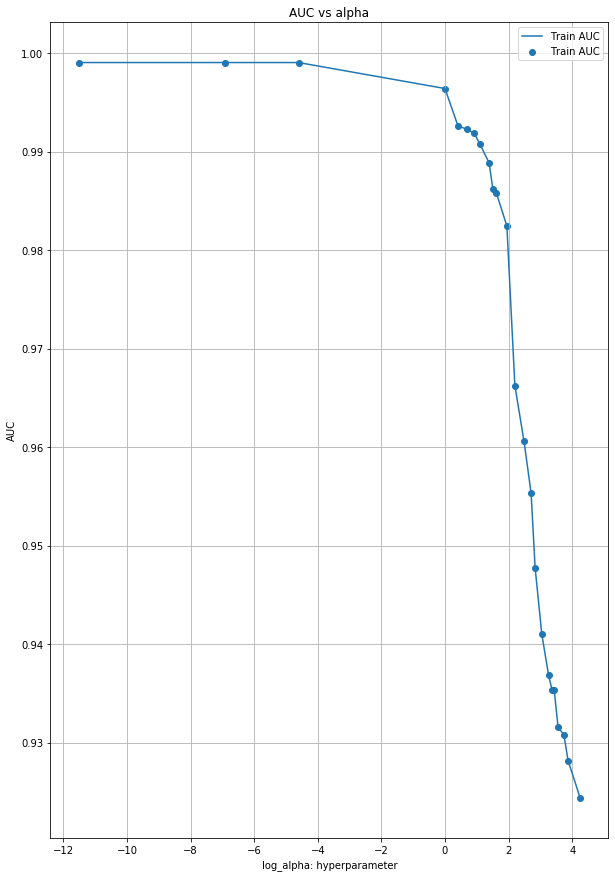

In [123]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import math
alpha1=[]
train_auc = []
cv_auc = []
alpha = [ 0.00001, 0.001, 0.01,1 ,1.5 ,2 ,2.5 ,3.001 ,4, 4.5 ,5,7,9, 12, 15 ,17, 21 ,26, 29, 31 ,35 ,42 ,48,70]
for i in tqdm(alpha):
    nb = MultinomialNB(alpha=i, class_prior=[0.5,0.5]) #to deal with class imbalance we used class_prior as 0.5,0.5
    nb.fit(X, y) #during fit our model is learning from the training data e.g. y=f(x)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    y_train_pred =  nb.predict_log_proba(X)[:,1] #the reason for using log_probabilites is to encounter the problem of numerical stability
    #y_cv_pred =  nb.predict_log_proba(X_cv_dtm)[:,1]
    train_auc.append(roc_auc_score(y,y_train_pred))#roc_auc_score->Compute(ROC AUC) from prediction scores.
    #cv_auc.append(roc_auc_score(y_cv, y_cv_pred))  
  
for i in alpha:
    j=math.log(i)
    alpha1.append(j)
    
plt.figure(figsize=(10,15))
plt.plot(alpha1, train_auc, label='Train AUC') #Plotting K vs auc of train
plt.scatter(alpha1, train_auc, label='Train AUC') #Scatter plot of K vs auc train

#plt.plot(alpha1, cv_auc, label='CV AUC') #Plotting K vs auc of train
#plt.scatter(alpha1, cv_auc, label='CV AUC') #Scatter plot of K vs auc train

plt.legend() #adding legend
plt.xlabel("log_alpha: hyperparameter") #X axis-label
plt.ylabel("AUC")  #Y-axis label
plt.title("AUC vs alpha") #adding title of the plot
plt.grid()
plt.show()

Choosing **0.001** as value of the alpha(hyperparamter for Naive Bayes)

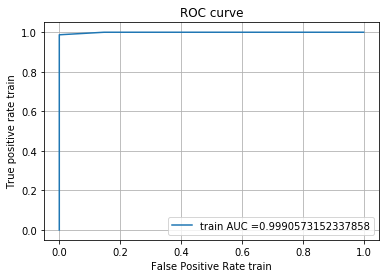

In [124]:
from sklearn.metrics import roc_curve,auc

neigh=MultinomialNB(alpha=0.001)
neigh.fit(X,y)

#documentation of roc_curve ->https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
#roc_curve returns three values fpr,tpr and thresholds
y_train_predict=neigh.predict_log_proba(X)[:,1]

train_fpr,train_tpr,train_thresholds= roc_curve(y,y_train_predict)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr))) #documentation of auc-> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html


plt.legend()
plt.xlabel("False Positive Rate train") #plt.plot documentation ->https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html
plt.ylabel("True positive rate train")
plt.title("ROC curve")
plt.grid()
plt.show()

**AUC score of 1.0 i.e 100%** certainly we have a condition of overfitting which is expected with such small data

## Confusion Matrix

In [125]:
y_pred = neigh.predict(X)

In [126]:
from sklearn.metrics import confusion_matrix
con_mat=confusion_matrix(y, y_pred) 
print(con_mat)

[[34  0]
 [ 1 77]]


It makes only 1 error , this can be due to overfitting but it is certainly performing better than KNN

In [128]:
#Refer->http://zetcode.com/python/prettytable/
#Refer->https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.percentile.html
#Refer->https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.round_.html
from prettytable import PrettyTable
x=PrettyTable()

x.field_names=["Vectorizer", "Model", "Best Hyperparameter","AUC"] #column headers

x.add_row(["BOW", "KNN", 5 , "97.8%"])
x.add_row(["BOW", "Naive Bayes", "0.001" , "99.9%"])

print(x)

+------------+-------------+---------------------+-------+
| Vectorizer |    Model    | Best Hyperparameter |  AUC  |
+------------+-------------+---------------------+-------+
|    BOW     |     KNN     |          5          | 97.8% |
|    BOW     | Naive Bayes |        0.001        | 99.9% |
+------------+-------------+---------------------+-------+


# Fine-Grained Sentiment Analysis

In [31]:
import os 
os.chdir("D:\\firefox downloads\\73strings")

In [126]:
#! pip install textblob

In [129]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, accuracy_score
from tqdm import tqdm

Reading the text files provided and the merging the **dataSentence.txt** and **dataSplit.txt** file on sentence index column

In [130]:
df = pd.read_csv('D:\\firefox downloads\\73strings\\stanfordSentimentTreebank\\datasetSentences.txt', sep='\t',)
                  

In [131]:
df.head()

,sentence_index,sentence
0,1,The Rock is destined to be the 21st Century 's...
1,2,The gorgeously elaborate continuation of `` Th...
2,3,Effective but too-tepid biopic
3,4,If you sometimes like to go to the movies to h...
4,5,"Emerges as something rare , an issue movie tha..."


In [132]:
df2 = pd.read_csv('D:\\firefox downloads\\73strings\\stanfordSentimentTreebank\\datasetSplit.txt', sep=',')
df2.head()
                  

,sentence_index,splitset_label
0,1,1
1,2,1
2,3,2
3,4,2
4,5,2


In [133]:
df3 = df.merge(df2, on ="sentence_index")

In [134]:
df3.head()

,sentence_index,sentence,splitset_label
0,1,The Rock is destined to be the 21st Century 's...,1
1,2,The gorgeously elaborate continuation of `` Th...,1
2,3,Effective but too-tepid biopic,2
3,4,If you sometimes like to go to the movies to h...,2
4,5,"Emerges as something rare , an issue movie tha...",2


Creating three separate text files **train.txt**, **test.txt** and **dev.txt**

In [135]:
train = df3["sentence"][df3["splitset_label"]==1]

In [136]:
train.shape

(8544,)

In [137]:
test = df3["sentence"][df3["splitset_label"]==2]
dev = df3["sentence"][df3["splitset_label"]==3]

In [138]:
dev.shape

(1101,)

In [139]:
test.shape

(2210,)

Now we will train our FastText model on **train data** and testing on our reviews

In [140]:
train = pd.read_csv('D:\\firefox downloads\\73strings\\stanfordSentimentTreebank\\sst_train.txt', sep='\t',header=None)
train.head()

,0,1
0,__label__4,The Rock is destined to be the 21st Century 's...
1,__label__5,The gorgeously elaborate continuation of `` Th...
2,__label__4,Singer/composer Bryan Adams contributes a slew...
3,__label__3,You 'd think by now America would have had eno...
4,__label__4,Yet the act is still charming here .


In [141]:
#https://github.com/prrao87/fine-grained-sentiment/blob/master/notebooks/model_trials.ipynb
def textblob_score(sentence):
    return TextBlob(sentence).sentiment.polarity

In [142]:
train['textblob_score'] = train[1].apply(textblob_score)
# Convert float score to category based on binning
train['textblob_pred'] = pd.cut(train['textblob_score'], bins=5, labels=[1, 2, 3, 4, 5])
train = train.drop('textblob_score', axis=1)
train.head()

,0,1,textblob_pred
0,__label__4,The Rock is destined to be the 21st Century 's...,4
1,__label__5,The gorgeously elaborate continuation of `` Th...,4
2,__label__4,Singer/composer Bryan Adams contributes a slew...,3
3,__label__3,You 'd think by now America would have had eno...,3
4,__label__4,Yet the act is still charming here .,5


In [143]:
import re 

In [145]:
data = pd.read_csv("D:\\firefox downloads\\73strings\\amazon_reviews_names.csv")

In [146]:
data.head()

,ASIN,Reviews,Titles,Ratings,Product_Names
0,B07X4R63DF,['\n\n \xa0Defective product shipped.. report...,"[""\nPray you don't receive a defective product...",['4.0 out of 5 stars'],"['\n\n\n\n\n\n\n\nRedmi 8A Dual (Sea Blue, 2GB..."
1,B086KCCMCP,['\n\n Damaged product\n\nRead more'],['\nVery chipper quality\n'],['3.9 out of 5 stars'],"['\n\n\n\n\n\n\n\nSamsung Galaxy M01 (Black, 3..."
2,B07HGJJ559,"[""\n\n Update (15/08/2020):Never give a chanc...",['\nValue For Money !! Go for it\n'],['4.2 out of 5 stars'],['\n\n\n\n\n\n\n\nSamsung Galaxy M21 (Midnight...
3,B089MQ622N,"[""\n\n Thank you samsung and Amazon for timel...",['\n#samsunghitsbullseye\n'],['3.1 out of 5 stars'],['\n\n\n\n\n\n\n\nSamsung Galaxy M01 Core (Bla...
4,B07SDPJ4XJ,['\n\n Brought this phone for my wife who is ...,['\nGood opportunity for oppo lovers to upgrad...,['4.2 out of 5 stars'],['\n\n\n\n\n\n\n\nOPPO A5 2020 (Dazzling White...


In [147]:
data.drop(["ASIN","Titles","Ratings"],axis = "columns",inplace =True)

In [148]:
data['Reviews'] = data["Reviews"].astype(str).str.replace('\[|\]|\'', '')

In [150]:
data['Product_Names'] = data["Product_Names"].astype(str).str.replace('\[|\]|\'', '')

In [151]:
data.head()

,Reviews,Product_Names
0,\n\n \xa0Defective product shipped.. reported...,"\n\n\n\n\n\n\n\nRedmi 8A Dual (Sea Blue, 2GB R..."
1,\n\n Damaged product\n\nRead more,"\n\n\n\n\n\n\n\nSamsung Galaxy M01 (Black, 3GB..."
2,"""\n\n Update (15/08/2020):Never give a chance...",\n\n\n\n\n\n\n\nSamsung Galaxy M21 (Midnight B...
3,"""\n\n Thank you samsung and Amazon for timely...",\n\n\n\n\n\n\n\nSamsung Galaxy M01 Core (Black...
4,\n\n Brought this phone for my wife who is di...,"\n\n\n\n\n\n\n\nOPPO A5 2020 (Dazzling White, ..."


In [152]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(data['Reviews'].values):
    sentance = re.sub(r"http\S+", "", sentance) #removing https if present
    sentance= sentance.replace("\\n","").replace("  ","") #removing //n if present
    sentance= re.sub("\S*\d\S*", "", sentance).strip() #removing special characters and emojis
    sentance = cleanhtml(sentance) #html tags
    sentance = decontracted(sentance) #decontraction
    sentance = cleanpunc(sentance) #cleaning punctuation
    sentance = re.sub('[^A-Za-z0-9]+', ' ', sentance)# https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in s) #converting everything to lowercase and stopword removal 
    preprocessed_reviews.append(sentance.strip("'"))

100%|██████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 7000.72it/s]


In [153]:
from nltk.tokenize import sent_tokenize, word_tokenize
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(sno.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [154]:
data['preprocessed_reviews']=preprocessed_reviews

In [155]:
data["preprocessed_reviews"] = data["preprocessed_reviews"].apply(stemSentence)

In [156]:
data.head()

,Reviews,Product_Names,preprocessed_reviews
0,\n\n \xa0Defective product shipped.. reported...,"\n\n\n\n\n\n\n\nRedmi 8A Dual (Sea Blue, 2GB R...",product ship report within afewhour receipt on...
1,\n\n Damaged product\n\nRead more,"\n\n\n\n\n\n\n\nSamsung Galaxy M01 (Black, 3GB...",damag productread
2,"""\n\n Update (15/08/2020):Never give a chance...",\n\n\n\n\n\n\n\nSamsung Galaxy M21 (Midnight B...,updat give chanc regret go ahead icon look gre...
3,"""\n\n Thank you samsung and Amazon for timely...",\n\n\n\n\n\n\n\nSamsung Galaxy M01 Core (Black...,thank samsung amazon time rakshabandhan delive...
4,\n\n Brought this phone for my wife who is di...,"\n\n\n\n\n\n\n\nOPPO A5 2020 (Dazzling White, ...",brought phone wife die hard fan oppo offer lik...


In [157]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_names = []
# tqdm is for printing the status bar
for sentance in tqdm(data['Product_Names'].values):
    sentance = re.sub(r"http\S+", "", sentance) #removing https if present
    sentance= sentance.replace("\\n","").replace("  ","") #removing //n if present
    sentance= re.sub("\S*\d\S*", "", sentance).strip() #removing special characters and emojis
    sentance = cleanhtml(sentance) #html tags
    sentance = decontracted(sentance) #decontraction
    sentance = cleanpunc(sentance) #cleaning punctuation
    sentance = re.sub('[^A-Za-z0-9]+', ' ', sentance)# https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in s) #converting everything to lowercase and stopword removal 
    preprocessed_names.append(sentance.strip("'"))

100%|█████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 22402.69it/s]


In [158]:
data['preprocessed_names']=preprocessed_names

In [159]:
data["preprocessed_names"] = data["preprocessed_names"].apply(stemSentence)

In [160]:
data.head()

,Reviews,Product_Names,preprocessed_reviews,preprocessed_names
0,\n\n \xa0Defective product shipped.. reported...,"\n\n\n\n\n\n\n\nRedmi 8A Dual (Sea Blue, 2GB R...",product ship report within afewhour receipt on...,redmi dual sea blue ram storag dual camera mah...
1,\n\n Damaged product\n\nRead more,"\n\n\n\n\n\n\n\nSamsung Galaxy M01 (Black, 3GB...",damag productread,samsung galaxi black ram storag cost emi addit...
2,"""\n\n Update (15/08/2020):Never give a chance...",\n\n\n\n\n\n\n\nSamsung Galaxy M21 (Midnight B...,updat give chanc regret go ahead icon look gre...,samsung galaxi midnight blue ram storag
3,"""\n\n Thank you samsung and Amazon for timely...",\n\n\n\n\n\n\n\nSamsung Galaxy M01 Core (Black...,thank samsung amazon time rakshabandhan delive...,samsung galaxi core black ram storag cost emi ...
4,\n\n Brought this phone for my wife who is di...,"\n\n\n\n\n\n\n\nOPPO A5 2020 (Dazzling White, ...",brought phone wife die hard fan oppo offer lik...,oppo dazzl white ram storag cost emi addit exc...


In [161]:
data.drop(["Reviews","Product_Names"],axis = "columns",inplace =True )

In [162]:
data.head()

,preprocessed_reviews,preprocessed_names
0,product ship report within afewhour receipt on...,redmi dual sea blue ram storag dual camera mah...
1,damag productread,samsung galaxi black ram storag cost emi addit...
2,updat give chanc regret go ahead icon look gre...,samsung galaxi midnight blue ram storag
3,thank samsung amazon time rakshabandhan delive...,samsung galaxi core black ram storag cost emi ...
4,brought phone wife die hard fan oppo offer lik...,oppo dazzl white ram storag cost emi addit exc...


In [163]:
data['textblob_score'] = data["preprocessed_reviews"].apply(textblob_score)
# Convert float score to category based on binning
data['textblob_pred'] = pd.cut(data['textblob_score'], bins=5, labels=[1, 2, 3, 4, 5])
data = data.drop('textblob_score', axis=1)
data.head()

,preprocessed_reviews,preprocessed_names,textblob_pred
0,product ship report within afewhour receipt on...,redmi dual sea blue ram storag dual camera mah...,3
1,damag productread,samsung galaxi black ram storag cost emi addit...,3
2,updat give chanc regret go ahead icon look gre...,samsung galaxi midnight blue ram storag,4
3,thank samsung amazon time rakshabandhan delive...,samsung galaxi core black ram storag cost emi ...,3
4,brought phone wife die hard fan oppo offer lik...,oppo dazzl white ram storag cost emi addit exc...,4


In [164]:
data.to_csv("Fine_Grained_Sentiment_Analysis.csv",sep=',',index=False)